In [8]:
with open("../DATA/t10k-images-idx3-ubyte/t10k-images.idx3-ubyte","rb") as f :
    for _ in range(4):
        all_data = f.read(4)
        print(all_data)

b'\x00\x00\x08\x03'
b"\x00\x00'\x10"
b'\x00\x00\x00\x1c'
b'\x00\x00\x00\x1c'


In [10]:
# 바이트를 알아보는 문자로 변환
all_data.hex()


'0000001c'

In [11]:
# 파이썬의 byte 데이터 변환 모듈 struct 활용
# 학습용 : train.csv
# 테스트용 : test.csv
# 위치 : ../DATA/txt

data_dir="../DATA/txt"
train_file=data_dir+"train.csv"
test_file=data_dir+"test.csv"


In [18]:
import os, struct
# CSV 변환 기능 함수
DEBUG=False

def to_csv(name, maxdata): # t10k, train 입력 
    
    # (1) CSV 저장할 데이터 준비
    # 레이블 파일과 이미지 파일 열기
    lbl_f = open("../data/MNIST/"+name+"-labels.idx1-ubyte", "rb")
    img_f = open("../data/MNIST/"+name+"-images.idx3-ubyte", "rb")
    # CSV 파일 생성
    csv_f = open("../data/MNIST/"+name+".csv", "w", encoding="utf-8")
    # 헤더 정보 읽기
    mag, lbl_count = struct.unpack(">II", lbl_f.read(8)) # 매직 코드 + 레이블 갯수
    mag, img_count = struct.unpack(">II", img_f.read(8)) # 매직 코드 + 이미지 갯수
    rows, cols = struct.unpack(">II", img_f.read(8)) # 행, 열 갯수
    pixels = rows * cols
    if DEBUG:
        print('lbl_count {}, img_count {}'.format(lbl_count, img_count))
        print('rows {}, cols {}'.format(rows, cols))

    # (2) 이미지 데이터를 읽고 CSV로 저장
    for idx in range(lbl_count):
        if idx > maxdata: break
        # 숫자이미지 데이터가 의미하는 숫자값 읽기
        # 튜플타입 리턴
        label = struct.unpack("B", lbl_f.read(1))[0] 
        if DEBUG: print(' label = >{}'.format(label))

        # 이미지 데이터 읽기
        bdata = img_f.read(pixels)
        sdata = list(map(lambda n: str(n), bdata)) # 문자열로 변환
        if DEBUG: print('sdata => {}'.format(sdata))
        # CSV 파일에 쓰기
        csv_f.write(str(label)+",") # 숫자 라벨 쓰기
        csv_f.write(','.join(sdata) + "\r\n") # 리스트 이미지 데이터->문자열 변환 쓰기
    csv_f.close()
    lbl_f.close()
    img_f.close()
    
    # 생성된 파일 존재 여부 확인 후 반환
    if os.path.exists("../data/MNIST/"+name+".csv"):
        return True
    else:
        return False


In [22]:
to_csv("train",1000)

True

In [23]:
to_csv("t10k",1000)

True

In [27]:
# 이미지 데이터 로딩 후 시각화
import pandas as pd
import numpy as np

trainDF = pd.read_csv("../data/MNIST/train.csv", header=None)

In [32]:
trainDF

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
998,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
999,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
labels=trainDF[0]
img_data = trainDF[trainDF.columns[1:]]
labels.shape, img_data.shape

((1001,), (1001, 784))

In [36]:
# 1차원 이미지를 2차원으로 변환
raw_img=img_data.iloc[0].values
type(raw_img), raw_img.shape, raw_img.ndim

(numpy.ndarray, (784,), 1)

In [37]:
raw_img=raw_img.reshape(-1,28)
type(raw_img), raw_img.shape, raw_img.ndim

(numpy.ndarray, (28, 28), 2)

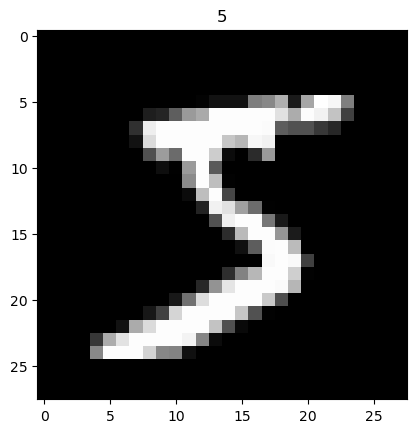

In [40]:
import matplotlib.pyplot as plt

plt.imshow(raw_img, cmap="gray")
plt.title(labels.iloc[0])
plt.show()

In [ ]:
data_path='../data/img/' # 데이터 폴더경로
# 폴더 내 모든 폴더, 파일 추출
for dir_name in os.listdir(data_path):
    sub_path=(data_path+dir_name).lower()
    if os.path.isdir(sub_path):
        filelist=os.listdir(sub_path) 
        print(f'--- [{dir_name}] filelist : {filelist}')

In [ ]:
# 폴더 내 특정 확장자 파일 리스트 추출
data_path='../data/img/' # 데이터 폴더경로
file_ext='.png' # 특정 추출 확장자
# 폴더 내 모든 폴더, 파일 추출
for dir_name in os.listdir(data_path):
    sub_path=(data_path+dir_name).lower()
    # 확장자 체크
    if sub_path.endswith(file_ext) : 
        print(f'--- [{dir_name}] filelist : {sub_path}')